In [1]:
from all_bear_dates import BearData as bd
import yfinance as yf
import pandas as pd
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import fredpy as fp
import datetime
import talib as ta
from dotenv import load_dotenv
import os

Internet connection required. Check connection.


In [2]:
fp.api_key = os.getenv("FREDPY_API_KEY")

In [3]:
def convert_index(series: pd.Series) -> pd.Series:
    series.index = [date.date() for date in series.index]
    return series

In [4]:
spx = convert_index(yf.download("^SPX")["Close"])
rsp = convert_index(yf.download("RSP")["Close"])
iwm = convert_index(yf.download("IWM")["Close"])
vix = convert_index(yf.download("^VIX")["Close"])
xlf = yf.download("XLF")["Close"]
xlk = yf.download("XLK")["Close"]
xlp = yf.download("XLP")["Close"]
xlf = yf.download("XLF")["Close"]
xle = yf.download("XLE")["Close"]
xly = yf.download("XLY")["Close"]
xlb = yf.download("XLB")["Close"]
xli = yf.download("XLI")["Close"]
xlu = yf.download("XLU")["Close"]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
m2 = pd.read_csv("/Users/benjamin/Downloads/WM2NS.csv").set_index("DATE")["WM2NS"]
m2.index = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in m2.index]

In [6]:
unemp = fp.series("UNRATE").data
curve_spread = fp.series("T10Y2Y").data
ten_year = fp.series("DGS10").data
cp = fp.series("COMPOUT").data
ind_prod = fp.series("INDPRO").data
house_prices = fp.series("CSUSHPINSA").data
fed_borrowing = fp.series("BORROW").data
sentimeent = fp.series("UMCSENT").data
vix = fp.series("VIXCLS").data
unemp = fp.series("UNRATE").data
non_farm = fp.series("PAYEMS").data


In [7]:
bear_data = bd(spx)
technical_bear_dates = bear_data.get_technical_bear_dates()
filtered_bear_dates = bear_data.get_filtered_bear_dates()

In [10]:
bear_dates_breadth = bear_data.concat_fp_series(filtered_bear_dates, spx / rsp, "breadth", False, True)


AttributeError: 'datetime.date' object has no attribute 'date'

In [11]:
bear_dates_m2  = bear_data.concat_fp_series(filtered_bear_dates, m2, "m2", False, True)


/Users/benjamin/Documents/Projects/Code/Python/bear-market-analysis/all_bear_dates.py:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  series = round((series - series[0]) / series[0] * 100, 2)


In [12]:
bear_data.concat_multiple_fp_series(filtered_bear_dates, 
                                    (unemp, "unemp_change", True, False), 
                                    (m2, "m2_pct_change", False, True),
                                    (curve_spread, "10y_2y_spread_change", False, False),
                                    (ten_year, "ten_year_change", True, False))

/Users/benjamin/Documents/Projects/Code/Python/bear-market-analysis/all_bear_dates.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  series = round(series - series[0], 2)
/Users/benjamin/Documents/Projects/Code/Python/bear-market-analysis/all_bear_dates.py:142: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  series = round((series - series[0]) / series[0] * 100, 2)
/Users/benjamin/Documents/Projects/Code/Python/bear-market-analysis/all_bear_dates.py:140: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat

date                                           info           \
           top      bottom         end    new_high bear_traps duration   
0   1929-09-16  1932-06-01  1935-05-09  1954-09-22          7     2061   
1   1937-03-10  1942-04-28  1942-10-02  1946-02-05          3     2032   
2   1946-05-29  1949-06-13  1949-11-02  1950-06-09          1     1253   
3   1956-08-02  1957-10-22  1958-07-25  1958-09-24          0      722   
4   1961-12-12  1962-06-26  1962-12-06  1963-09-03          0      359   
5   1966-02-09  1966-10-07  1967-02-14  1967-05-04          0      370   
6   1968-11-29  1970-05-26  1970-09-28  1972-03-06          0      668   
7   1973-01-11  1974-10-03  1974-11-05  1980-07-17          0      663   
8   1976-09-21  1978-03-06  1978-08-09  1979-08-15          0      687   
9   1980-11-28  1982-08-12  1982-09-14  1982-11-03          0      655   
10  1987-08-25  1987-12-04  1988-03-08  1989-07-26          0      196   
11  1990-07-16  1990-10-11  1991-02-06  1991-02-13          0      205   
12  2000-03-24  2002-10-09  2002-11-21  2007-05-30          2      972   
13  2007-10-09  2009-03-09  2009-03-23  2013-03-28          1      531   
14  2011-04-29  2011-10-03  2012-01-25  2012-02-24          0      271   
15  2022-01-03  2022-10-12  2023-06-08        None          0      521   

   unemp_change               m2_pct_change                  \
         bottom  end new_high        bottom    end new_high   
0           NaN  NaN      NaN           NaN    NaN      NaN   
1           NaN  NaN      NaN           NaN    NaN      NaN   
2           NaN  NaN      NaN           NaN    NaN      NaN   
3           1.0  3.3      2.6           NaN    NaN      NaN   
4          -0.6 -0.5     -0.5           NaN    NaN      NaN   
5          -0.1  0.0      0.0           NaN    NaN      NaN   
6           1.5  2.1      2.4           NaN    NaN      NaN   
7           1.1  1.7      2.8           NaN    NaN      NaN   
8          -1.4 -1.8     -1.7           NaN    NaN      NaN   
9           2.6  2.9      3.6         15.46  16.70    17.36   
10         -0.2 -0.2     -0.7          2.12   3.72     9.55   
11          0.4  1.1      1.1          1.06   1.69     2.09   
12          1.9  2.2      0.8         20.23  22.12    52.70   
13          4.0  4.3      2.9         14.11  14.09    43.06   
14         -0.2 -0.7     -0.8          6.01   7.92     8.66   
15         -0.3 -0.4      NaN         -1.48  -3.99      NaN   

   10y_2y_spread_change                       ten_year_change                 
                    top bottom   end new_high          bottom   end new_high  
0                   NaN    NaN   NaN      NaN             NaN   NaN      NaN  
1                   NaN    NaN   NaN      NaN             NaN   NaN      NaN  
2                   NaN    NaN   NaN      NaN             NaN   NaN      NaN  
3                   NaN    NaN   NaN      NaN             NaN   NaN      NaN  
4                   NaN    NaN   NaN      NaN             NaN   NaN      NaN  
5                   NaN    NaN   NaN      NaN            0.28 -0.10     0.02  
6                   NaN    NaN   NaN      NaN            2.44  1.53     0.23  
7                   NaN    NaN   NaN      NaN            1.61   NaN     3.78  
8                  1.21   0.47  0.17    -0.41            0.54  0.83     1.49  
9                 -1.41   0.62  0.68     0.81            0.83 -0.16    -2.26  
10                 0.94   1.22  1.08     0.27            0.21 -0.40    -0.71  
11                 0.29   0.93  0.97     1.00            0.48 -0.65    -0.66  
12                -0.44   1.89  2.09    -0.01           -2.59 -2.06    -1.32  
13                 0.52   1.93  1.75     1.62           -1.78 -1.99    -2.80  
14                 2.71   1.56  1.79     1.67           -1.52 -1.31    -1.34  
15                 0.85  -0.37 -0.79      NaN            2.28  2.10      NaN

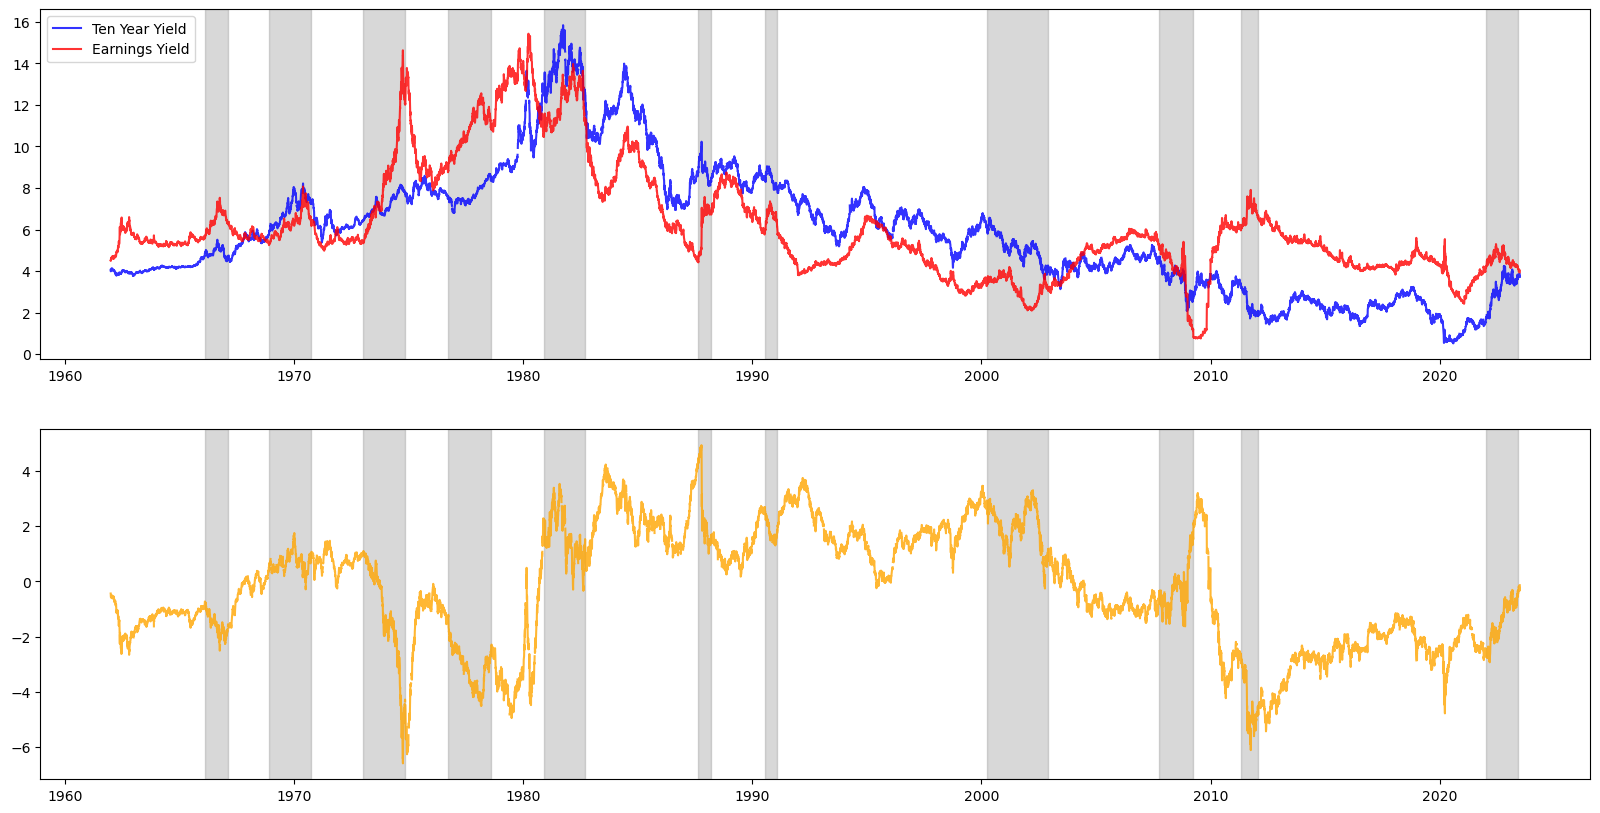

In [123]:
fig, ax = plt.subplots(2,1, figsize = (20,10))
latest_date = max(ten_year.index[0], earnings_yield.index[0])
ax[0].plot(ten_year[latest_date:], color = "blue", alpha = 0.8, label = "Ten Year Yield")
ax[0].plot(earnings_yield[latest_date:], color = "red", alpha = 0.8, label = "Earnings Yield")
ax[1].plot(ten_year - earnings_yield, color = "orange", alpha = 0.8, label = "spread")
for row in filtered_bear_dates["date"].iterrows():
    if (row[1]["top"] - latest_date.date()).days >= 0:
        ax[0].axvspan(row[1]["top"], row[1]["end"], color = "grey", alpha = 0.3)
        ax[1].axvspan(row[1]["top"], row[1]["end"], color = "grey", alpha = 0.3)

ax[0].legend()

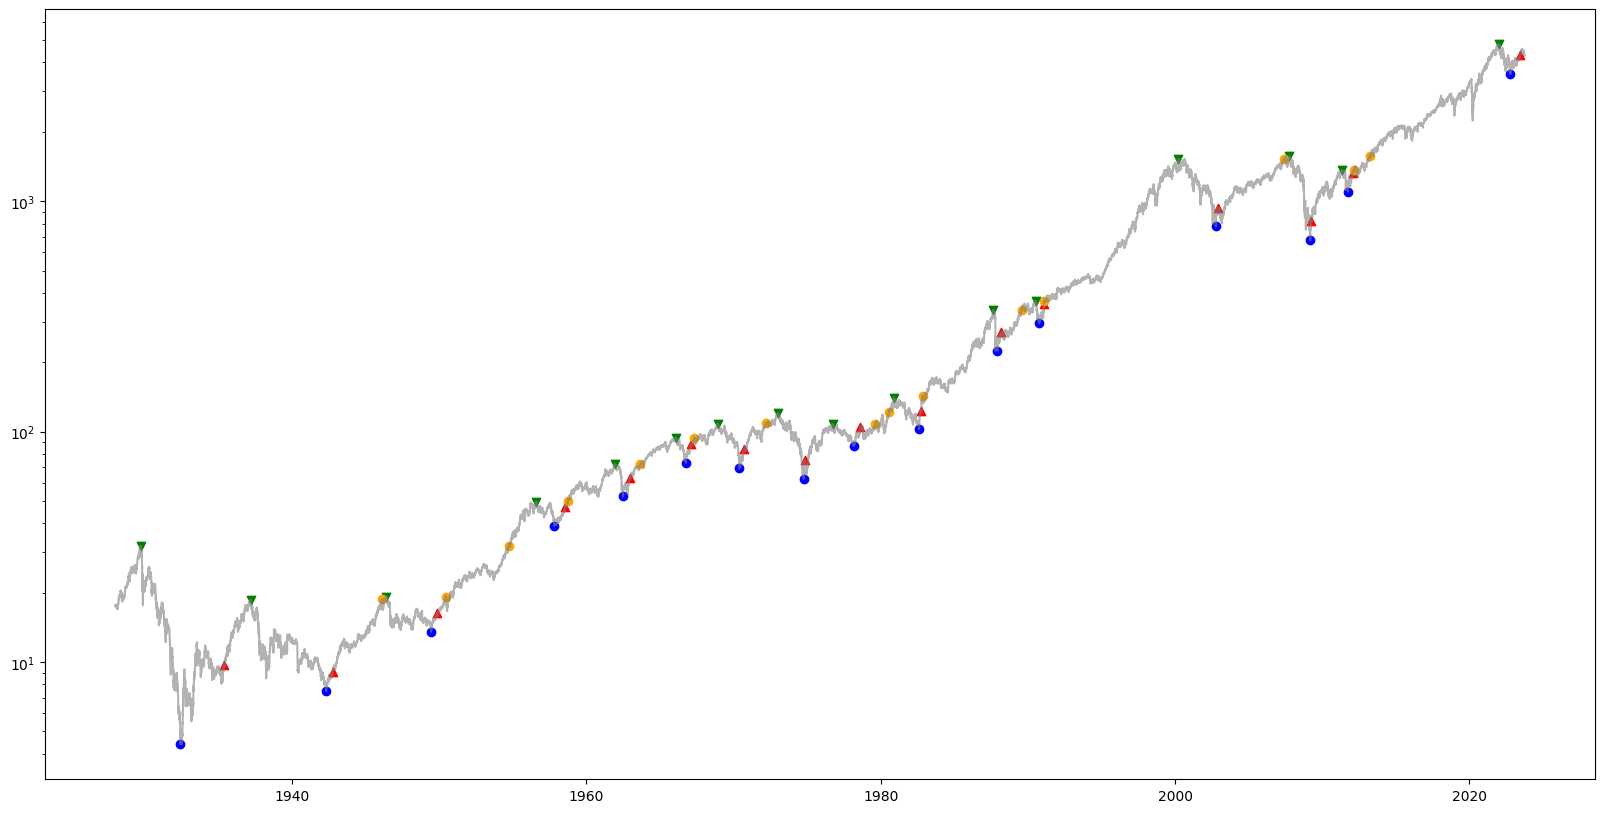

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
ax.set_yscale("log")
ax.plot(spx, color = "grey", alpha = 0.6)
ax.scatter(filtered_bear_dates["date", "top"], spx[filtered_bear_dates["date", "top"]], marker = "v", color = "green")
ax.scatter(filtered_bear_dates["date", "end"], spx[filtered_bear_dates["date", "end"]], marker = "^", color = "red")
ax.scatter(filtered_bear_dates["date", "bottom"], spx[filtered_bear_dates["date", "bottom"]], marker = "o", color = "blue")
new_highs_filtered = [date for date in filtered_bear_dates["date", "new_high"] if date]
ax.scatter(new_highs_filtered, spx[new_highs_filtered], marker = "o", color = "orange")

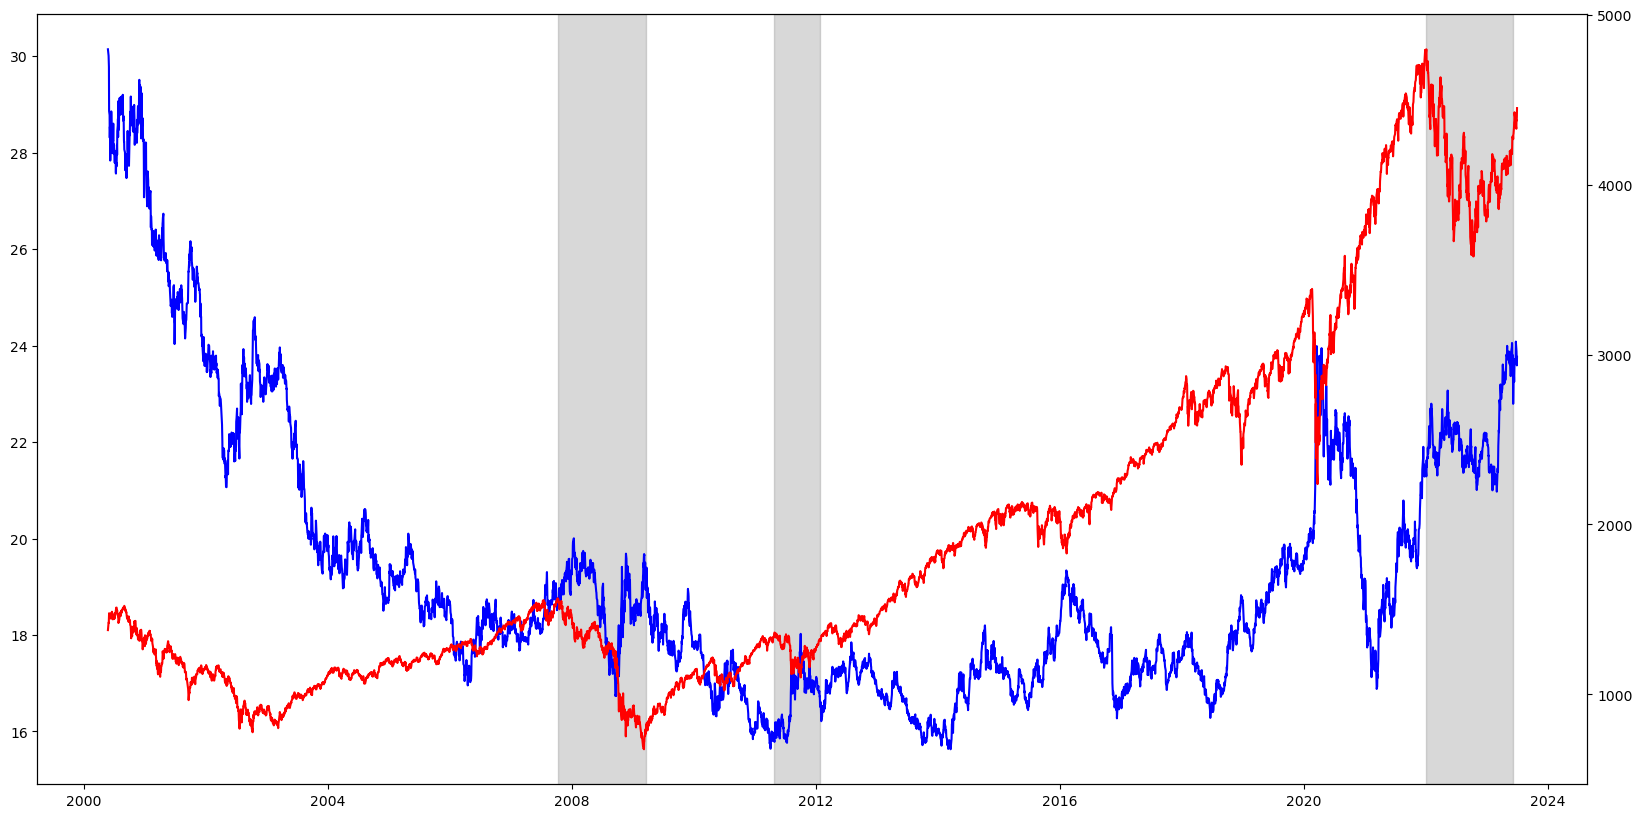

In [137]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(spx / iwm, color = "blue")
ax2 = ax.twinx()
ax2.plot(spx[(spx / iwm).dropna().index[0]:], color = "red")
for row in filtered_bear_dates["date"].iterrows():
    if (row[1]["top"] - (spx / iwm).dropna().index[0]).days >= 0:
        ax.axvspan(row[1]["top"], row[1]["end"], color = "grey", alpha = 0.3)

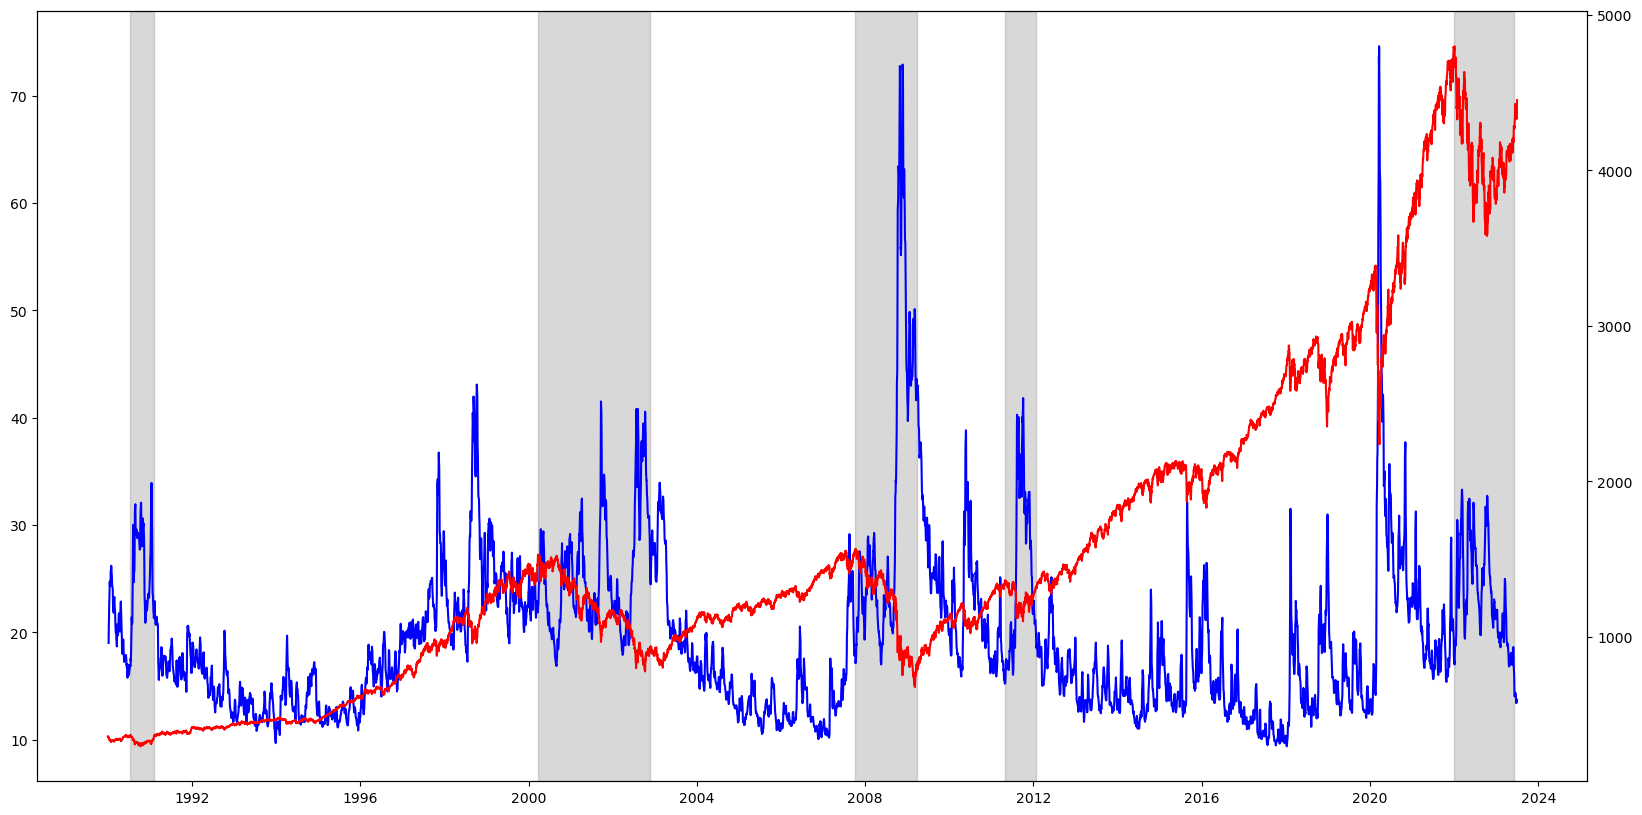

In [136]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(ta.MA(vix, 5), color = "blue")
ax2 = ax.twinx()
ax2.plot(spx[vix.index[0]:], color = "red")
for row in filtered_bear_dates["date"].iterrows():
    if (row[1]["top"] - vix.index[0]).days >= 0:
        ax.axvspan(row[1]["top"], row[1]["end"], color = "grey", alpha = 0.3)